In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import matplotlib.gridspec as gridspec
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df_train=pd.read_csv('trainEDA.csv')

In [3]:
df_train.shape

(1460, 81)

In [4]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df_train_high_data=df_train[['MSSubClass','Street','Utilities',
                             'Neighborhood','Condition1','BldgType','OverallQual','YearBuilt','YearRemodAdd',
                             'Exterior1st','ExterCond','Foundation','CentralAir','LowQualFinSF','KitchenQual',
                             'Functional','Fence','SaleCondition']]

df_train_high_NumData=df_train[['MSSubClass','OverallQual','YearBuilt','YearRemodAdd','LowQualFinSF']]

In [7]:
df_train_high_data.columns
df_train_high_NumData.columns

Index(['MSSubClass', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'LowQualFinSF'],
      dtype='object')

In [8]:
df_train_high_data.shape

(1460, 18)

In [9]:
gs = gridspec.GridSpec(2,3, hspace=0.4, wspace=0.3)

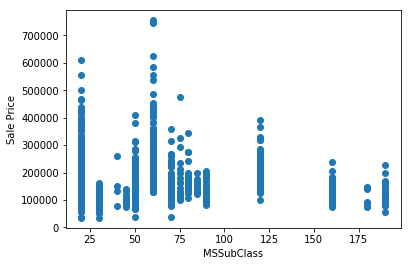

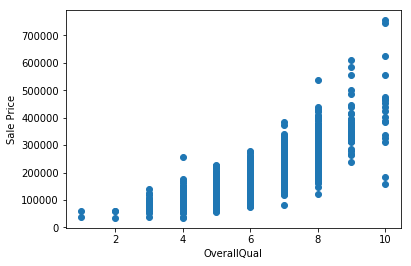

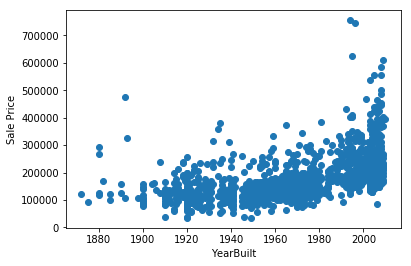

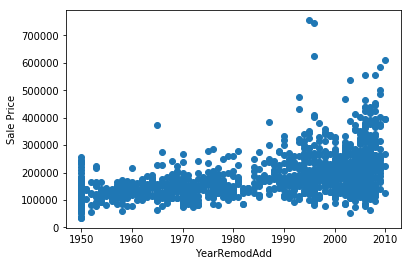

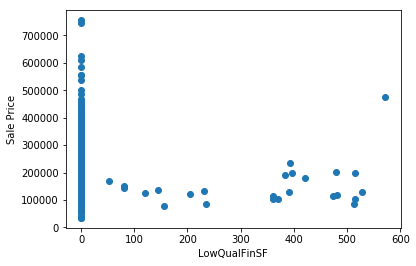

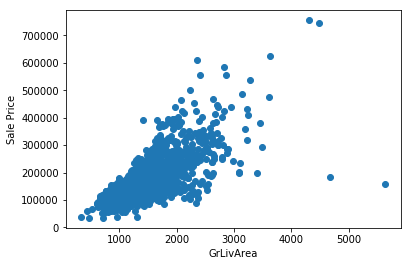

In [10]:
y=df_train['SalePrice']

cols=['MSSubClass','OverallQual','YearBuilt','YearRemodAdd','LowQualFinSF','GrLivArea']


for col_name in cols:
    figure=plt.figure
    ax=plt.gca()
    ax.scatter(df_train[col_name],y)
    ax.set_xlabel(col_name)
    ax.set_ylabel('Sale Price')
    plt.show()


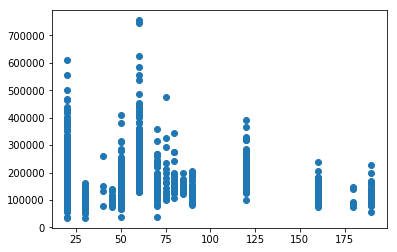

In [11]:
plt.scatter(df_train_high_data['MSSubClass'],y)

In [12]:
#analysis of the target variable
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

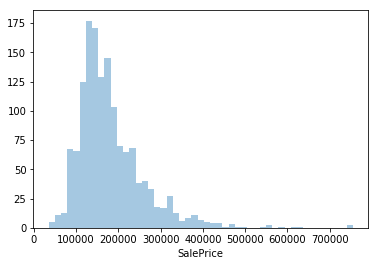

In [13]:
#This is for the univariate analysis
sns.distplot(df_train['SalePrice'],kde=False)

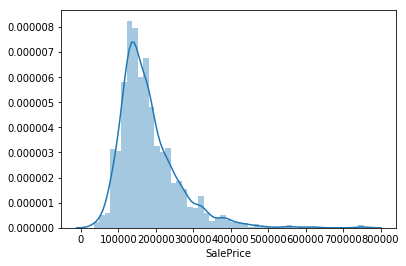

In [14]:
sns.distplot(df_train['SalePrice'])

In [15]:
### Skewness and Kurtosis
print('Skewness : %f' %df_train['SalePrice'].skew())
print('Kurtosis : %f' %df_train['SalePrice'].kurt())

Skewness : 1.882876
Kurtosis : 6.536282


(-0.5, 9.5, 0, 800000)

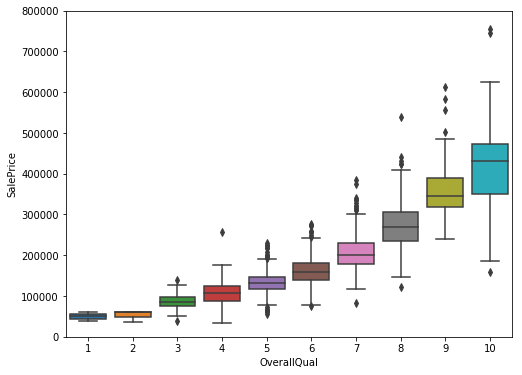

In [16]:
x='OverallQual'
data=pd.concat([df_train['SalePrice'],df_train[x]],axis=1)
f,ax=plt.subplots(figsize=(8,6))
fig=sns.boxplot(x=x,y='SalePrice',data=data)
fig.axis(ymin=0,ymax=800000)



(-0.5, 9.5, 0, 800000)

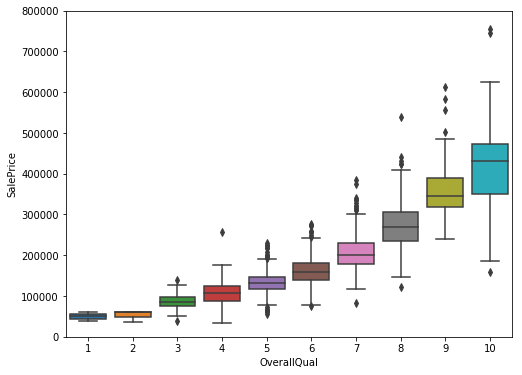

In [17]:
fig=plt.figure(figsize=(8,6))
fig=sns.boxplot(df_train['OverallQual'],df_train['SalePrice'])
fig.axis(ymin=0,ymax=800000)

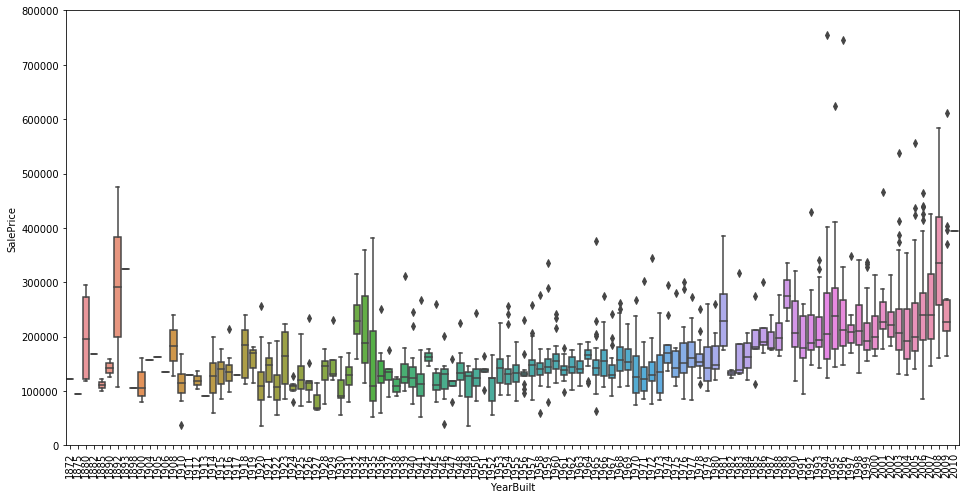

In [18]:
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

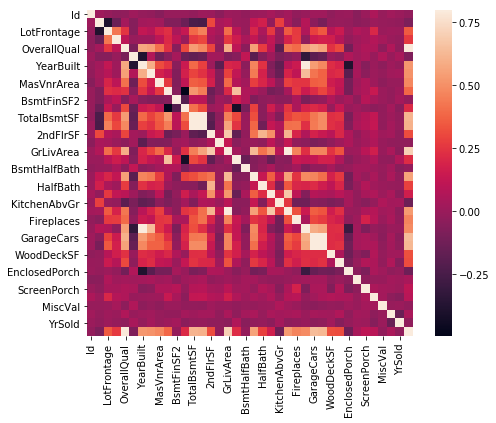

In [19]:
#Correlation Matrix
corrmatrix=df_train.corr()
fig=plt.figure(figsize=(8,6))
fig=sns.heatmap(corrmatrix,vmax=.8,square=True)

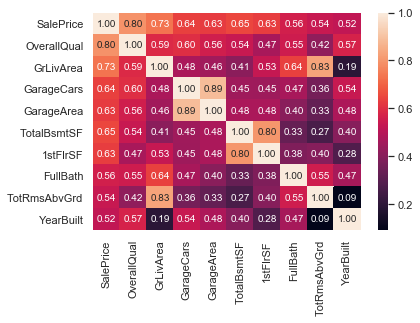

In [36]:
#Sales Price Correlation matrix

k=10 #Number of variables in heatmap

col=corrmatrix.nlargest(k,'SalePrice')['SalePrice'].index
cm=np.corrcoef(df_train[col].values.T)
sns.set(font_scale=1)
hm=sns.heatmap(cm,cbar=True,annot=True,fmt='.2f',annot_kws={'size':10},yticklabels=col.values,xticklabels=col.values)
plt.show()

In [43]:
cm

array([[1.        , 0.7958625 , 0.73496203, 0.6411112 , 0.62920912,
        0.65155328, 0.6316672 , 0.56238387, 0.53782613, 0.52398606],
       [0.7958625 , 1.        , 0.58942693, 0.60106235, 0.55718766,
        0.53831177, 0.46879015, 0.54909053, 0.42089126, 0.57238196],
       [0.73496203, 0.58942693, 1.        , 0.47551542, 0.45633034,
        0.40891173, 0.53375252, 0.63865296, 0.82958694, 0.1946708 ],
       [0.6411112 , 0.60106235, 0.47551542, 1.        , 0.88744248,
        0.45265492, 0.44962652, 0.46814459, 0.36110999, 0.537316  ],
       [0.62920912, 0.55718766, 0.45633034, 0.88744248, 1.        ,
        0.47513591, 0.47725844, 0.40436465, 0.32880797, 0.47850321],
       [0.65155328, 0.53831177, 0.40891173, 0.45265492, 0.47513591,
        1.        , 0.80366877, 0.3289625 , 0.26672719, 0.40208197],
       [0.6316672 , 0.46879015, 0.53375252, 0.44962652, 0.47725844,
        0.80366877, 1.        , 0.38295138, 0.3967814 , 0.28235789],
       [0.56238387, 0.54909053, 0.6386529

In [42]:
col=corrmatrix.nlargest(k,'SalePrice')['SalePrice'].index
col

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

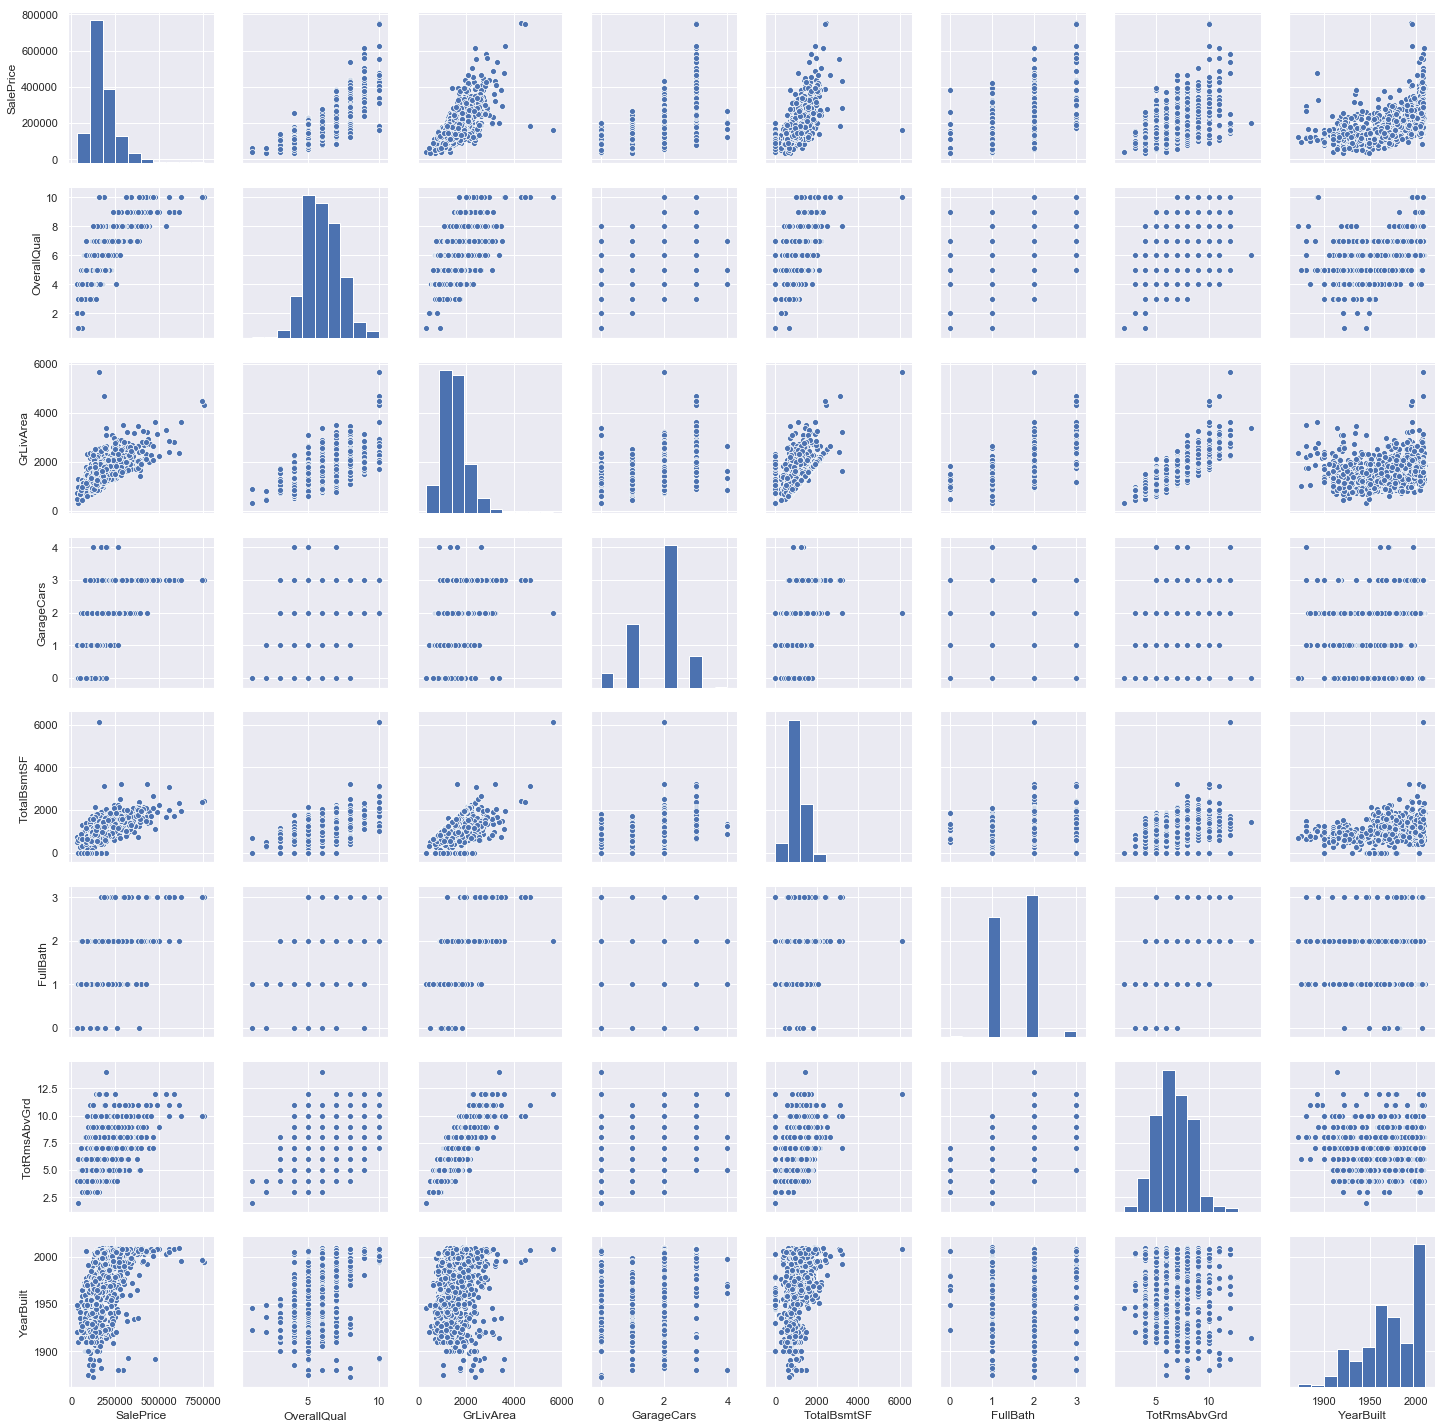

In [21]:
high_corr_cols=['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars','TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']
sns.pairplot(df_train[high_corr_cols],size=2.5)
plt.show()

In [22]:
col

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

In [23]:
#Handling Missing Data

Total_null_values=df_train.isnull().sum().sort_values(ascending=False)
Percentage=(df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)

missing_data=pd.concat([Total_null_values,Percentage],axis=1, keys=['Total_null_values','Percentage'] )
missing_data.head(20)


,Total_null_values,Percentage
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [24]:
df_train=df_train.drop(missing_data[missing_data['Total_null_values']>1].index,1)
df_train=df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)

In [25]:
df_train.isna().sum().max()

0

In [26]:
#Data Standardization

scaled_SalePrice_data=StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis])
low_range=scaled_SalePrice_data[scaled_SalePrice_data[:,0].argsort()][:10]
hig_range=scaled_SalePrice_data[scaled_SalePrice_data[:,0].argsort()][-10:]

print('High Range: ',hig_range)
print('Low Range: ',low_range)

High Range:  [[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]
Low Range:  [[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]


In [27]:
scaled_SalePrice_data[:,0]

array([ 0.34704187,  0.0071701 ,  0.53585953, ...,  1.07713679,
       -0.48847623, -0.42081658])

In [28]:
scaled_SalePrice_data.shape

(1459, 1)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


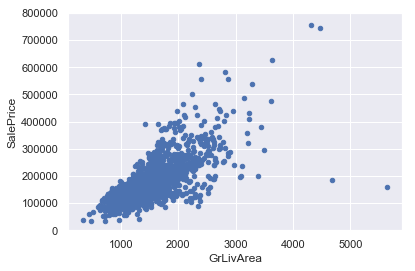

In [29]:
#A Scatter Plot between GrLivArea and SalePrice
#sns.scatterplot(df_train['GrLivArea'],df_train['SalePrice'])
var='GrLivArea'
data=pd.concat([df_train['SalePrice'],df_train[var]],axis=1)

data.plot.scatter(x=var,y='SalePrice',ylim=(0,800000))


In [30]:
df_train.sort_values(by='GrLivArea',ascending=False)[:2]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,...,0,0,0,480,0,1,2008,New,Partial,160000
523,524,60,RL,40094,Pave,IR1,Bnk,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2007,New,Partial,184750


In [31]:
df_train=df_train.drop(df_train[df_train['Id']==1299].index)
df_train=df_train.drop(df_train[df_train['Id'] == 524].index)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


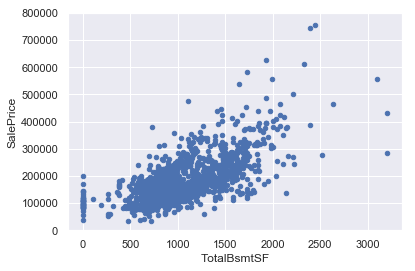

In [32]:
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

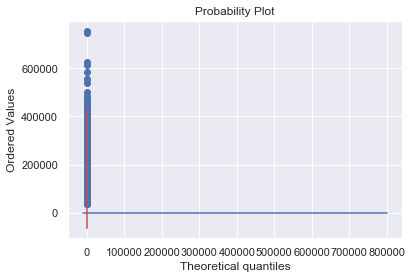

In [33]:
sns.distplot(df_train['SalePrice'])
fig = plt.figure
res = stats.probplot(df_train['SalePrice'], plot=plt)


In [34]:
fig=plt.figure()

<Figure size 432x288 with 0 Axes>

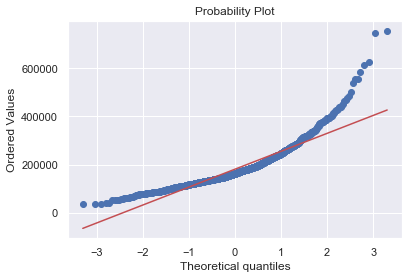

In [35]:
fig = plt.figure
res = stats.probplot(df_train['SalePrice'], plot=plt)